In [91]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, GRU
from keras import regularizers

import matplotlib.pyplot
import seaborn as sns

In [4]:
MAX_FEATURES = 10000
MAX_LEN = 500

In [26]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = MAX_FEATURES)

In [28]:
input_train = sequence.pad_sequences(input_train, maxlen = MAX_LEN)
input_test = sequence.pad_sequences(input_test, maxlen = MAX_LEN)

In [29]:
input_train.shape

(25000, 500)

In [73]:
def plot_history(history):
    _, axes = matplotlib.pyplot.subplots(1, 2, figsize = (15, 5))
    
    x = range(len(history['loss']))
    
    sns.lineplot(x, history['loss'], ax = axes[0])
    sns.lineplot(x, history['val_loss'], ax = axes[0])
    axes[0].legend(['loss', 'val_loss'])
    
    sns.lineplot(x, history['accuracy'], ax = axes[1])
    sns.lineplot(x, history['val_accuracy'], ax = axes[1])
    axes[1].legend(['accuracy', 'val_accuracy'])


def print_best_res(history):
    min_val_loss = np.min(history['val_loss'])
    max_val_accuracy = np.max(history['val_accuracy'])
    print(f"Best val_loss: {min_val_loss}")
    print(f"Best val_accuracy: {max_val_accuracy}")

In [75]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [70]:
model1 = Sequential()
model1.add(Embedding(MAX_FEATURES, 32))
model1.add(GRU(32))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

In [71]:
%%time
history1 = model1.fit(input_train,
                      y_train,
                      epochs = 10,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 59s 353ms/step - loss: 0.6103 - accuracy: 0.6462 - val_loss: 0.3592 - val_accuracy: 0.8516
Epoch 2/10
157/157 [==============================] - 61s 386ms/step - loss: 0.2956 - accuracy: 0.8784 - val_loss: 0.2984 - val_accuracy: 0.8770
Epoch 3/10
157/157 [==============================] - 56s 360ms/step - loss: 0.2507 - accuracy: 0.9011 - val_loss: 0.3575 - val_accuracy: 0.8360
Epoch 4/10
157/157 [==============================] - 67s 430ms/step - loss: 0.2018 - accuracy: 0.9271 - val_loss: 0.3125 - val_accuracy: 0.8710
Epoch 5/10
157/157 [==============================] - 64s 404ms/step - loss: 0.1728 - accuracy: 0.9362 - val_loss: 0.4017 - val_accuracy: 0.8572
Epoch 6/10
157/157 [==============================] - 59s 377ms/step - loss: 0.1585 - accuracy: 0.9419 - val_loss: 0.3160 - val_accuracy: 0.8816
Epoch 7/10
157/157 [==============================] - 62s 396ms/step - loss: 0.1353 - accuracy: 0.9520 - val_loss: 0.3333 - val_ac

Best val_loss: 0.298356294631958
Best val_accuracy: 0.8876000046730042


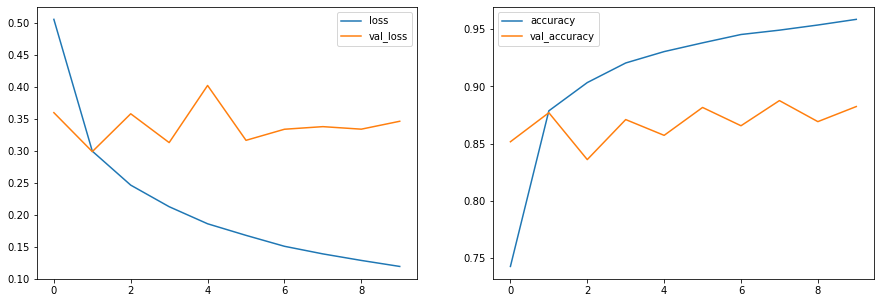

In [74]:
print_plot_history(history1.history)
print_best_res(history1.history)

In [98]:
model2 = Sequential()
model2.add(Embedding(MAX_FEATURES, 32))
model2.add(GRU(32, 
               dropout = 0.2, 
               recurrent_dropout = 0.2, 
               kernel_regularizer = regularizers.l2(0.0001), 
               return_sequences = True))
model2.add(GRU(32, 
               dropout = 0.2, 
               recurrent_dropout = 0.2, 
               kernel_regularizer = regularizers.l2(0.0001)))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
gru_6 (GRU)                  (None, None, 32)          6336      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 332,705
Trainable params: 332,705
Non-trainable params: 0
_________________________________________________________________


In [99]:
history2 = model2.fit(input_train, 
                      y_train,
                      epochs = 10,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 223s 1s/step - loss: 0.6276 - accuracy: 0.6260 - val_loss: 0.8921 - val_accuracy: 0.6722
Epoch 2/10
157/157 [==============================] - 226s 1s/step - loss: 0.3382 - accuracy: 0.8638 - val_loss: 0.3003 - val_accuracy: 0.8762
Epoch 3/10
157/157 [==============================] - 228s 1s/step - loss: 0.2687 - accuracy: 0.8958 - val_loss: 0.3514 - val_accuracy: 0.8550
Epoch 4/10
157/157 [==============================] - 226s 1s/step - loss: 0.2331 - accuracy: 0.9107 - val_loss: 0.2929 - val_accuracy: 0.8868
Epoch 5/10
157/157 [==============================] - 226s 1s/step - loss: 0.2045 - accuracy: 0.9232 - val_loss: 0.3066 - val_accuracy: 0.8872
Epoch 6/10
157/157 [==============================] - 229s 1s/step - loss: 0.1741 - accuracy: 0.9396 - val_loss: 0.3429 - val_accuracy: 0.8568
Epoch 7/10
157/157 [==============================] - 227s 1s/step - loss: 0.1708 - accuracy: 0.9414 - val_loss: 0.3270 - val_accuracy: 0.8904

Best val_loss: 0.2929387390613556
Best val_accuracy: 0.8903999924659729


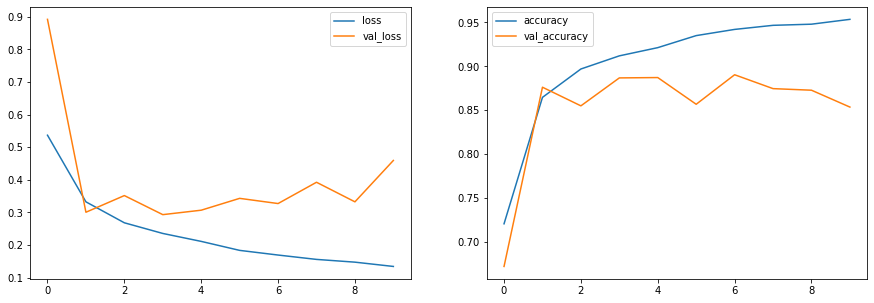

In [100]:
print_plot_history(history2.history)
print_best_res(history2.history)